# source link : https://datamillnorth.org/dataset/customer-meter-data

# local area study dataset link :
# https://datamillnorth.org/dataset/yorkshire-water-daily-customer-meter-data--local-area-
# https://datamillnorth.org/download/yorkshire-water-daily-customer-meter-data--local-area-/fb01ce66-423a-4111-9065-d989bdf0b3ce/Daily%20m3%201315.csv

In [1]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
url = "https://datamillnorth.org/download/customer-meter-data/b9f2cc02-3fe2-42ae-8470-b2e5d96af712/201415%20YW%20Customer%20Meter%20Data.csv"
df = pd.read_csv(url)


GROSS_COMSUMPTION - (READING_END_READING)-(READING_START_READING).  One unit = 1m3 (1000 litres)

In [2]:
df.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
0,NaN,NaN,NaN,1012229,27/06/2014 00:00,08/09/2014 00:00,339.0,345.0,6,0.081,Actual Automated Meter Reading,,NaN,5.0
1,NaN,NaN,NaN,1012229,06/12/2014 00:00,09/03/2015 00:00,360.0,386.0,26,0.277,Actual Automated Meter Reading,,NaN,0.0
2,NaN,,All new Domestic Properties,755928,11/02/2014 00:00,29/04/2014 00:00,2678.0,2716.0,38,0.487,Actual Automated Meter Reading,,NaN,8.0
3,NaN,,All new Domestic Properties,755928,09/08/2014 00:00,10/11/2014 00:00,2768.0,2845.0,77,0.819,Actual Automated Meter Reading,,NaN,8.0
4,NaN,,House RV 100-124,882360,25/01/2014 00:00,24/04/2014 00:00,98.0,102.0,4,0.044,Actual Automated Meter Reading,,81+,7.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485511 entries, 0 to 2485510
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   POSTAL_TOWN                object 
 1   POSTCODE_OUTCODE           object 
 2   PROPERTY_CLASS             object 
 3   METER_KEY                  int64  
 4   READING_START_DATE         object 
 5   READING_END_DATE           object 
 6   READING_START_READING      float64
 7   READING_END_READING        float64
 8   GROSS_CONSUMPTION          int64  
 9   DAILY_AVERAGE_CONSUMPTION  float64
 10  READING_SOURCE             object 
 11  CUSTOMER_TYPE              object 
 12  BILLPAYER_AGE              object 
 13  CURRENT_OCCUPANCY_AGE      float64
dtypes: float64(4), int64(2), object(8)
memory usage: 265.5+ MB


# some cleaning

In [4]:
df.dropna()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
227,Barnoldswick,BB18,House RV 150-399,89828,11/05/2014 00:00,22/08/2014 00:00,6740.0,6770.0,30,0.288,Normal reading,,61-70,18.0
228,Barnoldswick,BB18,House RV 150-399,89828,20/11/2014 00:00,12/02/2015 00:00,6799.0,6838.0,39,0.459,Normal reading,,61-70,18.0
231,Barnoldswick,BB18,House RV 150-399,89836,11/05/2014 00:00,22/08/2014 00:00,6580.0,6591.0,11,0.106,Normal reading,,61-70,33.0
232,Barnoldswick,BB18,House RV 150-399,89836,20/11/2014 00:00,13/02/2015 00:00,6602.0,6620.0,18,0.209,Normal reading,,61-70,33.0
233,Barnoldswick,BB18,House RV 150-399,89850,11/05/2014 00:00,21/08/2014 00:00,77.0,99.0,22,0.214,Actual Automated Meter Reading,,81+,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485491,Selby,YO8,House RV 76-99,1268406,30/03/2015 00:00,30/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,41-50,0.0
2485494,Selby,YO8,House RV 100-124,1268504,31/03/2015 00:00,31/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,51-60,0.0
2485495,Selby,YO8,House RV 125-149,1268725,31/03/2015 00:00,31/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,31-40,0.0
2485499,Selby,YO8,All new Domestic Properties,1270351,27/03/2015 00:00,27/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,16-30,0.0


In [5]:
df = df.drop_duplicates(keep='first')
df

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,METER_KEY,READING_START_DATE,READING_END_DATE,READING_START_READING,READING_END_READING,GROSS_CONSUMPTION,DAILY_AVERAGE_CONSUMPTION,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE,CURRENT_OCCUPANCY_AGE
0,NaN,NaN,NaN,1012229,27/06/2014 00:00,08/09/2014 00:00,339.0,345.0,6,0.081,Actual Automated Meter Reading,,NaN,5.0
1,NaN,NaN,NaN,1012229,06/12/2014 00:00,09/03/2015 00:00,360.0,386.0,26,0.277,Actual Automated Meter Reading,,NaN,0.0
2,NaN,,All new Domestic Properties,755928,11/02/2014 00:00,29/04/2014 00:00,2678.0,2716.0,38,0.487,Actual Automated Meter Reading,,NaN,8.0
3,NaN,,All new Domestic Properties,755928,09/08/2014 00:00,10/11/2014 00:00,2768.0,2845.0,77,0.819,Actual Automated Meter Reading,,NaN,8.0
4,NaN,,House RV 100-124,882360,25/01/2014 00:00,24/04/2014 00:00,98.0,102.0,4,0.044,Actual Automated Meter Reading,,81+,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485506,NaN,YO89,All new Domestic Properties,1260079,29/01/2015 00:00,29/01/2015 00:00,0.0,0.0,0,0.000,Normal reading,,NaN,0.0
2485507,NaN,YO89,All new Domestic Properties,1260079,29/01/2015 00:00,10/03/2015 00:00,0.0,0.0,0,0.000,Normal reading,,NaN,0.0
2485508,NaN,YO89,All new Domestic Properties,1260079,10/03/2015 00:00,25/03/2015 00:00,0.0,1.0,1,0.063,Actual Automated Meter Reading,,NaN,0.0
2485509,NaN,YO9,All new Domestic Properties,388182,24/01/2014 00:00,10/04/2014 00:00,582.0,609.0,27,0.351,Actual Automated Meter Reading,,31-40,7.0


# deeper data understanding

In [6]:
df['READING_SOURCE'].unique()

array(['Actual Automated Meter Reading', 'Reading confirmed as correct',
       'Normal reading', "Customer's own reading",
       'Zero consumption on live meter (not damaged)',
       'Reading high consumption customer informed',
       'Reading high consumption customer not informed',
       'Reading customer has left', 'Radio unit fitted',
       'Reading low consumption customer not informed',
       'Reading low consumption customer informed'], dtype=object)

In [7]:
df=df.dropna(subset=["POSTAL_TOWN"])
df['POSTAL_TOWN'].unique()

array(['Barnoldswick', 'Bradford', 'Bingley', 'Shipley', 'Cleckheaton',
       'Keighley', 'Skipton', 'Settle', 'Richmond', 'Darlington',
       'Northallerton', 'Bedale', 'Catterick Garrison', 'Doncaster',
       'Goole', 'Scunthorpe', 'Huddersfield', 'Harrogate', 'Ripon',
       'Knaresborough', 'Hull', 'Hessle', 'North Ferriby', 'Brough',
       'Cottingham', 'Beverley', 'Hornsea', 'Withernsea', 'Halifax',
       'Elland', 'Sowerby Bridge', 'Hebden Bridge', 'Lancaster',
       'Carnforth', 'Leeds', 'Otley', 'Wetherby', 'Tadcaster', 'Pudsey',
       'Ilkley', 'Todmorden', 'Sheffield', 'Rotherham', 'Mexborough',
       'Barnsley', 'Worksop', 'Saltburn-By-The-Sea', 'Wakefield',
       'Castleford', 'Knottingley', 'Dewsbury', 'Mirfield', 'Liversedge',
       'Heckmondwike', 'Batley', 'Ossett', 'Normanton', 'Pontefract',
       'York', 'Scarborough', 'Filey', 'Bridlington', 'Malton',
       'Pickering', 'Whitby', 'Driffield', 'Thirsk', 'Selby'],
      dtype=object)

In [8]:
df['PROPERTY_CLASS'].unique()

array(['House RV 150-399', 'All new Domestic Properties',
       'House RV 100-124', 'House RV 125-149', 'House RV 76-99',
       'House RV <75', 'House RV >400'], dtype=object)

In [9]:
df['BILLPAYER_AGE'].unique()

array(['61-70', nan, '81+', '16-30', '51-60', '41-50', '31-40', '71-80'],
      dtype=object)

In [10]:
df['CUSTOMER_TYPE'].unique()

array([' ', 'A', 'I', nan], dtype=object)

In [11]:
# df[df["CUSTOMER_TYPE"]==" "] = "I/A"
df['CUSTOMER_TYPE'].unique()

array([' ', 'A', 'I', nan], dtype=object)

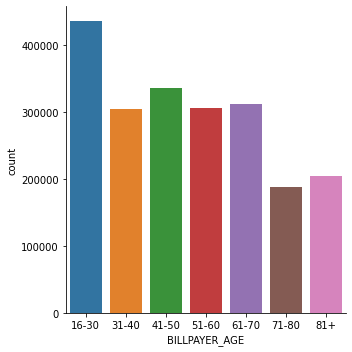

In [12]:
sns.catplot( x="BILLPAYER_AGE", kind="count", data=df.sort_values(by=['BILLPAYER_AGE']))


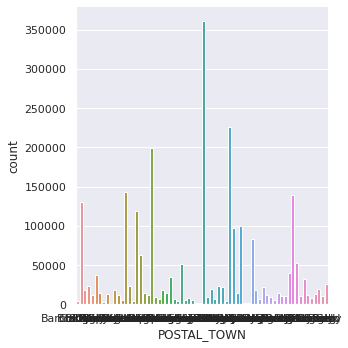

In [13]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.catplot( x="POSTAL_TOWN", kind="count", data=df)

# Towns on the map

In [14]:
from geopy.geocoders import Nominatim, GoogleV3


In [15]:

df2 = df.groupby(['POSTAL_TOWN'])["GROSS_CONSUMPTION"].mean().reset_index(name="total average gross consumption")
df2

,POSTAL_TOWN,total average gross consumption
0,Barnoldswick,18.732007
1,Barnsley,16.915519
2,Batley,20.728475
3,Bedale,18.104039
4,Beverley,18.826027
...,...,...
63,Wetherby,20.623030
64,Whitby,16.042869
65,Withernsea,16.590594
66,Worksop,26.557538


In [16]:
geolocator = Nominatim(user_agent="example")
L1=[] #lat
L2=[] #lon
L3=[] #name
for i in range (len(df2)) :
    data = geolocator.geocode(df2['POSTAL_TOWN'].loc[df2.index[i]])
    data.raw.get("lat"), data.raw.get("lon")
    L1.append(data.raw.get("lat"))
    L2.append(data.raw.get("lon"))
    L3.append(df2['POSTAL_TOWN'].loc[df2.index[i]])

In [17]:
# import the library
import folium
# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
# Show the map
m
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lon':L2,
   'lat':L1,
   'name':L3,
   'value':df2['total average gross consumption']
}, dtype=str)


In [18]:
# add marker one by one on the map
for i in range(len(df2)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['value'],
   ).add_to(m)
m
# Show the map again

some city seem to have the same name as some cities in the us and canada.

# some encoding

In [19]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,READING_START_DATE,READING_END_DATE,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE
227,Barnoldswick,BB18,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Normal reading,,61-70
228,Barnoldswick,BB18,House RV 150-399,20/11/2014 00:00,12/02/2015 00:00,Normal reading,,61-70
229,Barnoldswick,BB18,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Actual Automated Meter Reading,,NaN
230,Barnoldswick,BB18,House RV 150-399,20/11/2014 00:00,13/02/2015 00:00,Actual Automated Meter Reading,,NaN
231,Barnoldswick,BB18,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Normal reading,,61-70


In [20]:
obj_df[obj_df.isnull().any(axis=1)]


,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,READING_START_DATE,READING_END_DATE,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE
229,Barnoldswick,BB18,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Actual Automated Meter Reading,,NaN
230,Barnoldswick,BB18,House RV 150-399,20/11/2014 00:00,13/02/2015 00:00,Actual Automated Meter Reading,,NaN
240,Barnoldswick,BB18,House RV 150-399,28/02/2014 00:00,29/04/2014 00:00,Actual Automated Meter Reading,,NaN
241,Barnoldswick,BB18,House RV 150-399,29/04/2014 00:00,31/08/2014 00:00,Actual Automated Meter Reading,,NaN
242,Barnoldswick,BB18,House RV 150-399,31/08/2014 00:00,17/11/2014 00:00,Actual Automated Meter Reading,,NaN
...,...,...,...,...,...,...,...,...
2485497,Selby,YO8,All new Domestic Properties,27/03/2015 00:00,27/03/2015 00:00,Normal reading,,NaN
2485498,Selby,YO8,All new Domestic Properties,24/03/2015 00:00,24/03/2015 00:00,Normal reading,,NaN
2485500,Selby,YO8,All new Domestic Properties,27/03/2015 00:00,27/03/2015 00:00,Normal reading,,NaN
2485502,Selby,YO8,All new Domestic Properties,24/03/2015 00:00,24/03/2015 00:00,Normal reading,,NaN


fill nan values with the most frequent value

In [21]:
#obj_df["POSTAL_TOWN"].value_counts()
obj_df = obj_df.fillna({"POSTAL_TOWN": "Leeds"})
obj_df = obj_df.fillna({"BILLPAYER_AGE": "16-30"})
obj_df = obj_df.fillna({"PROPERTY_CLASS": "All new Domestic Properties"})
obj_df = obj_df.fillna({"CUSTOMER_TYPE": "I/A"})


In [22]:
obj_df.drop(columns=['POSTCODE_OUTCODE'])


,POSTAL_TOWN,PROPERTY_CLASS,READING_START_DATE,READING_END_DATE,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE
227,Barnoldswick,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Normal reading,,61-70
228,Barnoldswick,House RV 150-399,20/11/2014 00:00,12/02/2015 00:00,Normal reading,,61-70
229,Barnoldswick,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Actual Automated Meter Reading,,16-30
230,Barnoldswick,House RV 150-399,20/11/2014 00:00,13/02/2015 00:00,Actual Automated Meter Reading,,16-30
231,Barnoldswick,House RV 150-399,11/05/2014 00:00,22/08/2014 00:00,Normal reading,,61-70
...,...,...,...,...,...,...,...
2485499,Selby,All new Domestic Properties,27/03/2015 00:00,27/03/2015 00:00,Normal reading,,16-30
2485500,Selby,All new Domestic Properties,27/03/2015 00:00,27/03/2015 00:00,Normal reading,,16-30
2485501,Selby,All new Domestic Properties,30/03/2015 00:00,30/03/2015 00:00,Normal reading,,51-60
2485502,Selby,All new Domestic Properties,24/03/2015 00:00,24/03/2015 00:00,Normal reading,,16-30


In [23]:
cleanup_nums = {"CUSTOMER_TYPE":     {" ": 0, "I": 1, "A":2, 'I/A':3 },
                "BILLPAYER_AGE": {"16-30": 25, "31-40": 35, "41-50":45, "51-60": 55,
                                  "61-70": 65, "71-80": 75,"81+": 85 },
                "PROPERTY_CLASS": {"All new Domestic Properties":1 , "House RV <75": 2, 
                                  "House RV 76-99":3, "House RV 100-124":4, "House RV 125-149":5, 
                                  "House RV 150-399":6, "House RV >400":7 },
                "READING_SOURCE": {"Actual Automated Meter Reading": 1,"Normal reading":2,
                                  "Customer's own reading": 3,"Reading confirmed as correct":4,
                                  "Reading high consumption customer not informed":5, "Reading customer has left":6,
                                  "Reading low consumption customer not informed":7,"Radio unit fitted":8, 
                                  "Reading low consumption customer informed":9}
               }

In [24]:
obj_df = obj_df.replace(cleanup_nums)
obj_df.head()

,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,READING_START_DATE,READING_END_DATE,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE
227,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,2,0,65
228,Barnoldswick,BB18,6,20/11/2014 00:00,12/02/2015 00:00,2,0,65
229,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,1,0,25
230,Barnoldswick,BB18,6,20/11/2014 00:00,13/02/2015 00:00,1,0,25
231,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,2,0,65


In [26]:
obj_df.head()


,POSTAL_TOWN,POSTCODE_OUTCODE,PROPERTY_CLASS,READING_START_DATE,READING_END_DATE,READING_SOURCE,CUSTOMER_TYPE,BILLPAYER_AGE
227,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,2,0,65
228,Barnoldswick,BB18,6,20/11/2014 00:00,12/02/2015 00:00,2,0,65
229,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,1,0,25
230,Barnoldswick,BB18,6,20/11/2014 00:00,13/02/2015 00:00,1,0,25
231,Barnoldswick,BB18,6,11/05/2014 00:00,22/08/2014 00:00,2,0,65
